In [1]:
## Using binary image to draw contours.
## Not effective!!!
import cv2
 
# read the image
image = cv2.imread('12.jpg')
# convert the image to grayscale format
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# apply binary thresholding
ret, thresh = cv2.threshold(img_gray, 147, 255, cv2.THRESH_BINARY)
# visualize the binary image
cv2.imshow('Binary image', thresh)
cv2.waitKey(0)
cv2.imwrite('image_thres1.jpg', thresh)
cv2.destroyAllWindows()

# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
                                      
# draw contours on the original image
image_copy = image.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
                
# see the results
cv2.imshow('None approximation', image_copy)
cv2.waitKey(0)
cv2.imwrite('contours_none_image1.jpg', image_copy)
cv2.destroyAllWindows()

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [3]:
# Same as above
import cv2
import numpy as np

for i in range(1,12):
    frame = cv2.imread("./images/{}.jpg".format(i))
    new_width = 640
    new_height = 480

    # Resize the frame
    frame = cv2.resize(frame, (new_width, new_height))
    blurred_frame = cv2.GaussianBlur(frame, (5, 5), 0)
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    blue = 142
    lower = np.array([0,0,40])
    upper = np.array([225,225,blue])
    mask = cv2.inRange(hsv, lower, upper)
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    print(type(contours))

    c = 0
    for contour in contours:
        area = cv2.contourArea(contour)
        
        if area > 2000:
            temp_blue = blue
            rect = cv2.boundingRect(contour)
            x, y, w, h = rect
            roi = frame[y:y+h, x:x+w]
            h_roi = hsv[y:y+h, x:x+w]
            
            # If the area is tooooooooo large. The contour contains more than one object, do it again!
            if area > 60000:
                segment = []
                while len(segment) < 1:
                    temp_blue -= 3
                    lower = np.array([0,0,40])
                    upper = np.array([225,225,temp_blue])
                    mask = cv2.inRange(h_roi, lower, upper)
                    new_contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
                    filtered_contours = []
                    for cont in new_contours:
                        narea = cv2.contourArea(cont)
                        if narea > 2000:
                            filtered_contours.append(cont)
                    if len(filtered_contours) > 1:
                        segment += filtered_contours
                        
                for cont in segment:
                    rect = cv2.boundingRect(cont)
                    x, y, w, h = rect
                    new_roi = roi[y:y+h, x:x+w]
                    cv2.imwrite('./res/{}-object{}.jpg'.format(i,c), new_roi)
                    c += 1
#                     cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
                        
                continue 


            cv2.imwrite('./res/{}-object{}.jpg'.format(i,c), roi)
            c += 1
#             cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
             

#     cv2.imwrite('./res/segment{}.jpg'.format(i), frame)
    cv2.destroyAllWindows()

<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>


In [2]:
# The code for finding upper and lower value

import cv2
#empty function
def doNothing(x):
    pass
#creating a resizable window named Track Bars
cv2.namedWindow('Track Bars', cv2.WINDOW_NORMAL)
#creating track bars for gathering threshold values of red green and blue
cv2.createTrackbar('min_blue', 'Track Bars', 0, 255, doNothing)
cv2.createTrackbar('min_green', 'Track Bars', 0, 255, doNothing)
cv2.createTrackbar('min_red', 'Track Bars', 0, 255, doNothing)

cv2.createTrackbar('max_blue', 'Track Bars', 0, 255, doNothing)
cv2.createTrackbar('max_green', 'Track Bars', 0, 255, doNothing)
cv2.createTrackbar('max_red', 'Track Bars', 0, 255, doNothing)

# reading the image
object_image = cv2.imread('./images/6.jpg')

#resizing the image for viewing purposes
resized_image = cv2.resize(object_image,(800, 626))
#converting into HSV color model
hsv_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2HSV)

#showing both resized and hsv image in named windows
cv2.imshow('Base Image', resized_image)
cv2.imshow('HSV Image', hsv_image)

#creating a loop to get the feedback of the changes in trackbars
while True:
    #reading the trackbar values for thresholds
    min_blue = cv2.getTrackbarPos('min_blue', 'Track Bars')
    min_green = cv2.getTrackbarPos('min_green', 'Track Bars')
    min_red = cv2.getTrackbarPos('min_red', 'Track Bars')
    
    max_blue = cv2.getTrackbarPos('max_blue', 'Track Bars')
    max_green = cv2.getTrackbarPos('max_green', 'Track Bars')
    max_red = cv2.getTrackbarPos('max_red', 'Track Bars')
    
    #using inrange function to turn on the image pixels where object threshold is matched
    mask = cv2.inRange(hsv_image, (min_blue, min_green, min_red), (max_blue, max_green, max_red))
    #showing the mask image
    cv2.imshow('Mask Image', mask)
    # checking if q key is pressed to break out of loop
    key = cv2.waitKey(25)
    if key == ord('q'):
        break

#printing the threshold values for usage in detection application
print(f'min_blue {min_blue}  min_green {min_green} min_red {min_red}')
print(f'max_blue {max_blue}  max_green {max_green} max_red {max_red}')
#destroying all windows
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
MIN_MATCH_COUNT = 10
img1 = cv.imread('./res/1-object0.jpg', cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('./res/2-object0.jpg', cv.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

In [2]:
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)
    img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

Not enough matches are found - 1/10


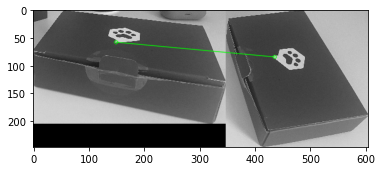

(<matplotlib.image.AxesImage at 0x1dbea016370>, None)

In [3]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.imshow(img3, 'gray'),plt.show()